# Python and Data Science Tutorial in Visual Studio Code
@Bragatte [Ref](https://code.visualstudio.com/docs/datascience/data-science-tutorial)actoring 

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("titanic.csv")

<AxesSubplot:xlabel='survived', ylabel='fare'>

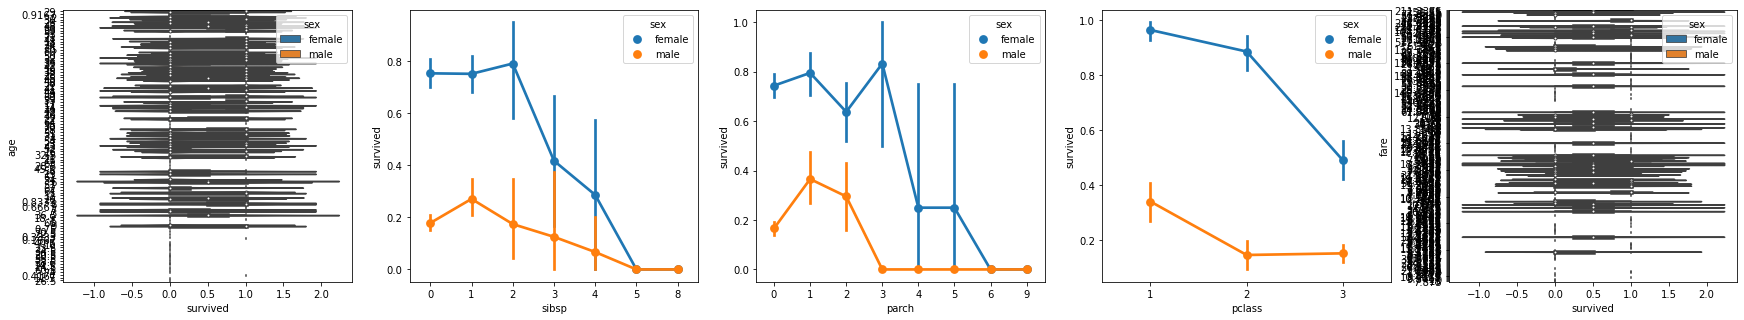

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [4]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

<AxesSubplot:xlabel='survived', ylabel='fare'>

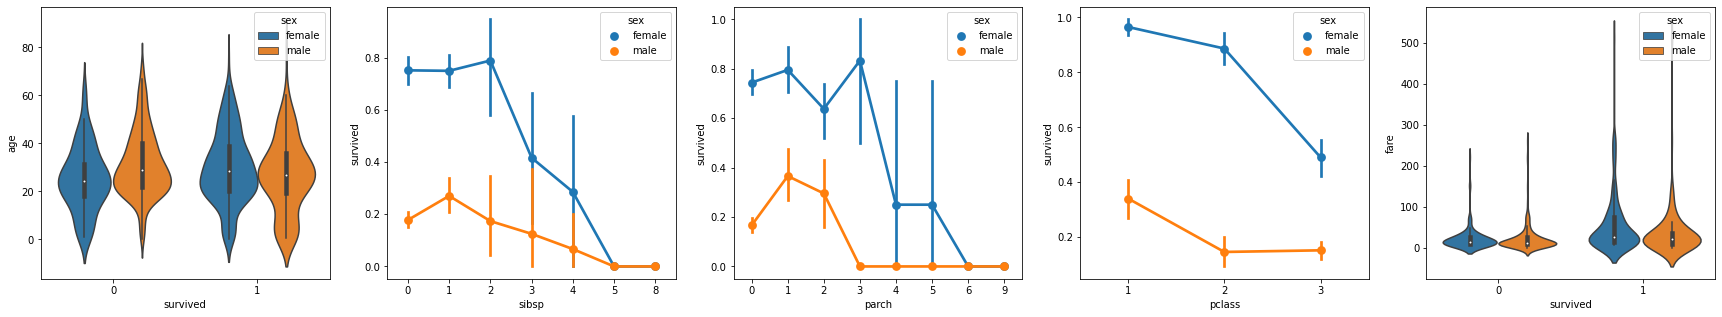

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [6]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [7]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [8]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [9]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

## Train and evaluate a model

In [10]:
#split up the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [12]:
#normalize the inputs
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [13]:
#Naïve Bayes algorithm
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [14]:
# Test data set that was held back from training
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


## Neural network to increase accuracy

In [ ]:
!pip install tensorflow

In [36]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [32]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 608us/step - loss: 0.6925 - accuracy: 0.5730
Epoch 2/50
27/27 [==============================] - 0s 612us/step - loss: 0.6907 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 569us/step - loss: 0.6873 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 546us/step - loss: 0.6800 - accuracy: 0.6758
Epoch 5/50
27/27 [==============================] - 0s 552us/step - loss: 0.6666 - accuracy: 0.7584
Epoch 6/50
27/27 [==============================] - 0s 555us/step - loss: 0.6459 - accuracy: 0.7679
Epoch 7/50
27/27 [==============================] - 0s 543us/step - loss: 0.6196 - accuracy: 0.7703
Epoch 8/50
27/27 [==============================] - 0s 534us/step - loss: 0.5895 - accuracy: 0.7715
Epoch 9/50
27/27 [==============================] - 0s 539us/step - loss: 0.5607 - accuracy: 0.7787
Epoch 10/50
27/27 [==============================] - 0s 524us/step - loss: 0.5352 - accuracy: 0.7739

In [35]:
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

AttributeError: 'Sequential' object has no attribute 'predict_classes'